### **Canny có thể được sử dụng để phát hiện cạnh trong ảnh màu không?**

Có. Tuy nhiên, thuật toán Canny nguyên bản chỉ làm việc
trên ảnh xám. Do đó, để áp dụng Canny cho ảnh màu,
cần thực hiện thêm bước xử lý trung gian.

Có hai cách tiếp cận phổ biến:
1. Chuyển ảnh màu sang ảnh xám rồi áp dụng Canny.
2. Áp dụng Canny trên từng kênh màu riêng biệt và kết hợp kết quả.


#### Cách 1 – Chuyển ảnh màu sang ảnh xám

Ảnh màu được chuyển sang ảnh xám trước khi áp dụng Canny.
Đây là cách đơn giản và phổ biến nhất,
do thuật toán Canny chỉ yêu cầu thông tin cường độ sáng.


(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

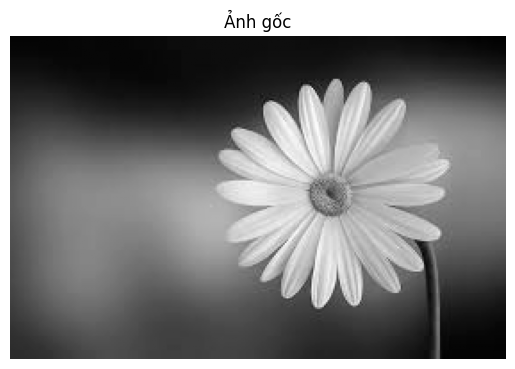

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("C:\\Users\\PC\\Downloads\\hoa.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Ảnh gốc")
plt.axis("off")


(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

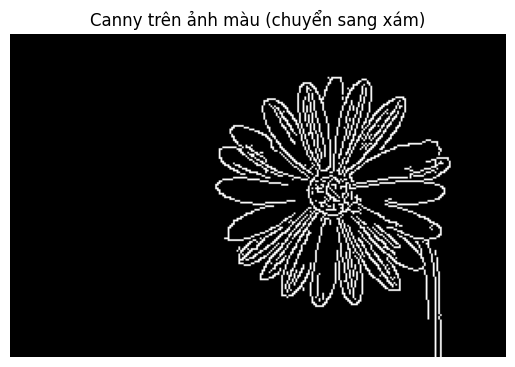

In [2]:
# Đọc ảnh màu
img_color = cv2.imread("C:\\Users\\PC\\Downloads\\hoa.jpg")

# Chuyển sang ảnh xám
gray_from_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Áp dụng Canny
edges_gray = cv2.Canny(gray_from_color, 50, 150)

plt.imshow(edges_gray, cmap="gray")
plt.title("Canny trên ảnh màu (chuyển sang xám)")
plt.axis("off")


#### Cách 2 – Áp dụng Canny trên từng kênh màu

Canny được áp dụng riêng cho từng kênh màu (B, G, R).
Sau đó, các kết quả được kết hợp lại để tạo ảnh cạnh cuối cùng.
Cách này có thể phát hiện thêm các cạnh chỉ xuất hiện
trong một kênh màu cụ thể.


(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

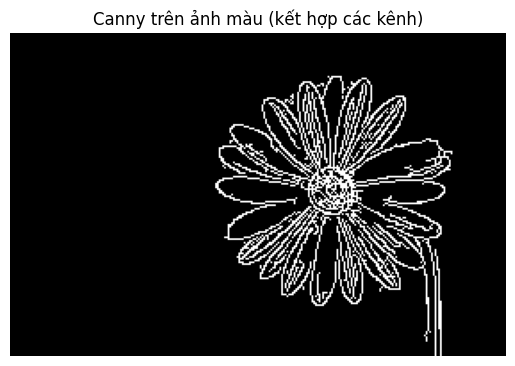

In [3]:
# Tách các kênh màu BGR
b, g, r = cv2.split(img_color)

edges_b = cv2.Canny(b, 50, 150)
edges_g = cv2.Canny(g, 50, 150)
edges_r = cv2.Canny(r, 50, 150)

# Kết hợp các cạnh
edges_color_combined = cv2.bitwise_or(edges_b, edges_g)
edges_color_combined = cv2.bitwise_or(edges_color_combined, edges_r)

plt.imshow(edges_color_combined, cmap="gray")
plt.title("Canny trên ảnh màu (kết hợp các kênh)")
plt.axis("off")


#### Nhận xét

Việc chuyển ảnh màu sang ảnh xám là cách tiếp cận đơn giản
và hiệu quả trong hầu hết các trường hợp.
Phương pháp áp dụng Canny trên từng kênh màu có thể phát hiện
nhiều cạnh hơn, nhưng đồng thời cũng dễ sinh thêm nhiễu
và làm giảm Precision.
